In [1]:
import os
import tensorflow as tf
tf.enable_eager_execution()
assert(tf.executing_eagerly)
import sys
sys.path.append("../")
from dataset_utils.tf_data_loader import ImageInputPipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Analyze Martensitic steel dataset

## Analyze train dataset

In [2]:
base_dir = "/mnt/sda/deep_learning/CSE527_FinalProject-master/images_martensite/"
train_rel_map = {"images": "train", "labels": "label"}
assert(os.path.isdir(base_dir))

In [3]:
train_input_pipeline = ImageInputPipeline(train_rel_map, ".tif", base_dir, shuffle=False)

Number of examples in dataset:  763


In [4]:
size = (256, 256)
num_pix_img = size[0] * size[1]
train_ds = train_input_pipeline._input_fn(size=size, batch_size=1, augment=False)

An example of how an image with defect area between 0.1% and 0.14% looks like:

W1220 13:57:58.690372 140233702110976 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W1220 13:57:58.690752 140234524186368 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W1220 13:57:58.690891 140234532579072 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W1220 13:57:58.691004 140233895044864 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string
W1220 13:57:58.691113 140233861474048 backprop.py:820] The dtype of the watched tensor must be floating (e.g. tf.float32), got tf.string


0.10528564453125


<IPython.core.display.Javascript object>


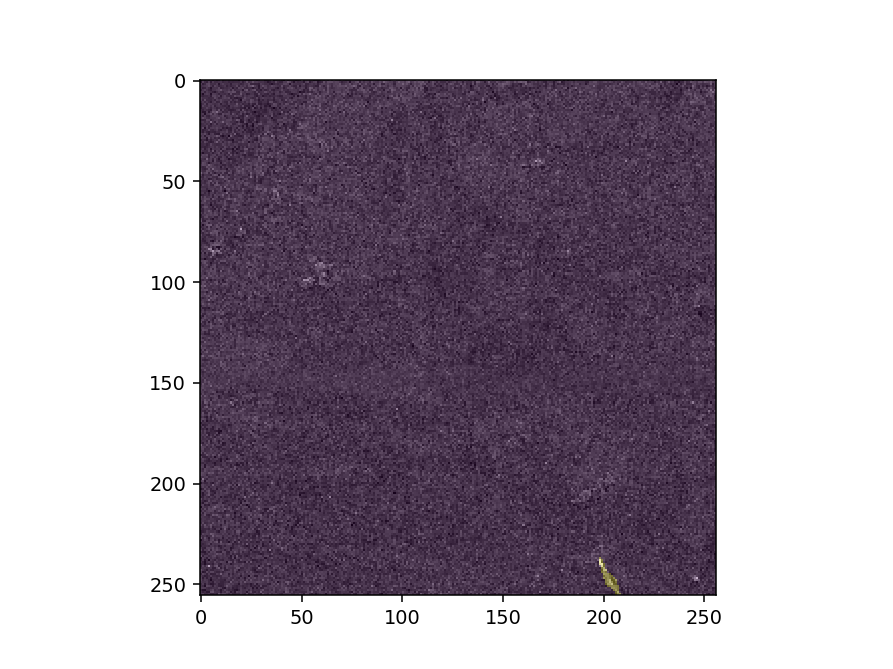

<IPython.core.display.Javascript object>


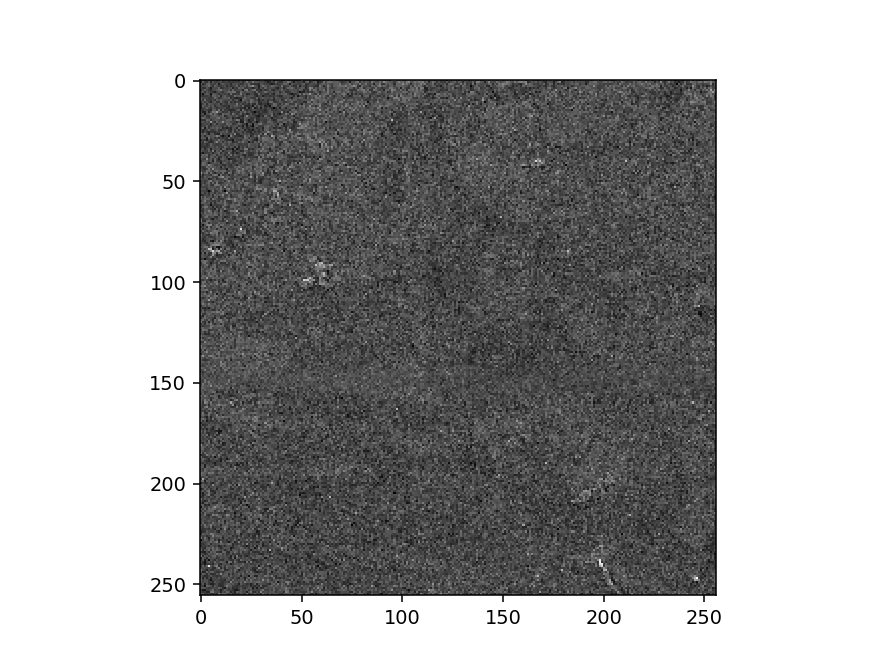

In [5]:
%matplotlib notebook
for img, mask in train_ds:
    if (mask>0).numpy().sum() > 0:
        percent_defect = 100*((mask.numpy()>0).sum())/num_pix_img
        if percent_defect > 0.1 and percent_defect < 0.14:
            print(percent_defect)
            plt.imshow(img[0,...,0], cmap="gray")
            plt.imshow(mask[0,...,0], alpha=0.3)
            plt.figure()
            plt.imshow(img[0,...,0], cmap="gray")
            break

In [6]:
pix_sum_crack = []
pix_sum_ext = []
for img, mask in train_ds:
    pix_sum_crack.append((mask.numpy()==1).sum())
    pix_sum_ext.append((mask.numpy()==2).sum())

In [7]:
train_df = pd.DataFrame(zip(pix_sum_crack, pix_sum_ext), columns=("#pix_crack", "#pix_ext")).replace(0, np.nan)
train_df.head()

,#pix_crack,#pix_ext
0,NaN,126.0
1,NaN,NaN
2,NaN,NaN
3,NaN,217.0
4,NaN,NaN


In [8]:
train_df["%pix_crack"] = np.where(pd.notna(train_df["#pix_crack"]), 100 * train_df["#pix_crack"]/num_pix_img, 0)
train_df["%pix_crack_na"] = 100 * train_df["#pix_crack"]/num_pix_img
train_df["%pix_ext"] = np.where(pd.notna(train_df["#pix_ext"]), 100 * train_df["#pix_ext"]/num_pix_img, 0)
train_df["%pix_ext_na"] = 100 * train_df["#pix_ext"]/num_pix_img
train_df.head()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
0,NaN,126.0,0.0,NaN,0.192261,0.192261
1,NaN,NaN,0.0,NaN,0.000000,NaN
2,NaN,NaN,0.0,NaN,0.000000,NaN
3,NaN,217.0,0.0,NaN,0.331116,0.331116
4,NaN,NaN,0.0,NaN,0.000000,NaN


The summary below shows that:

- Percentage of pixels with extrusion in the dataset is 0.186%
- Out of 763 images, only 279 has extrusion in it
- If only images with extrusions are considered, then the percentage of pixels with extrusion is 0.51%

In [9]:
train_df.describe()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
count,0.0,279.000000,763.0,0.0,763.000000,279.000000
mean,NaN,334.473118,0.0,NaN,0.186621,0.510365
std,NaN,494.142428,0.0,NaN,0.517599,0.754002
min,NaN,1.000000,0.0,NaN,0.000000,0.001526
25%,NaN,67.000000,0.0,NaN,0.000000,0.102234
50%,NaN,166.000000,0.0,NaN,0.000000,0.253296
75%,NaN,386.000000,0.0,NaN,0.137329,0.588989
max,NaN,4091.000000,0.0,NaN,6.242371,6.242371


The histogram below shows that 80% of the images with extrusions have percentage of extrusion area in the image in the range from 0 to 0.626 %

<IPython.core.display.Javascript object>


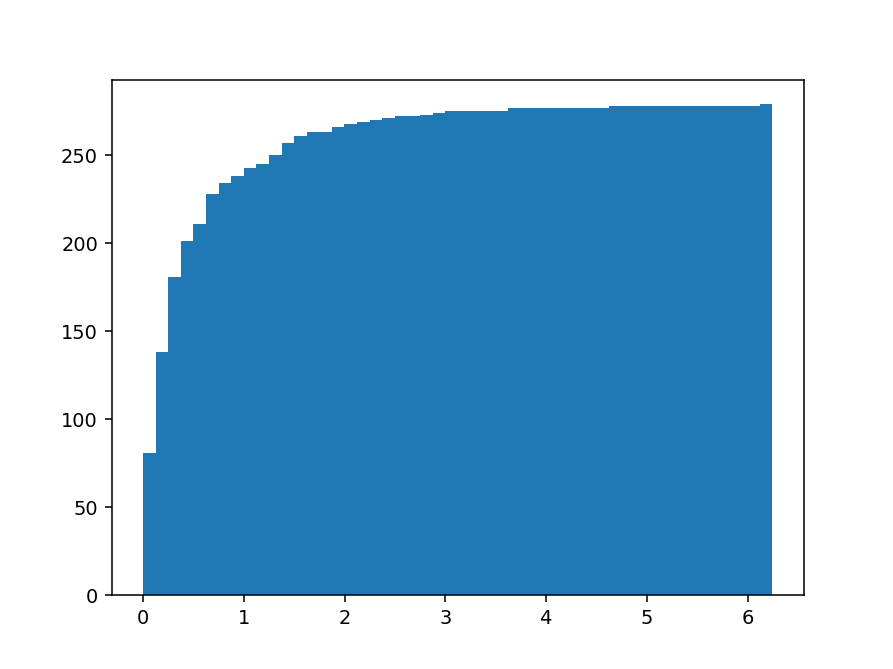

/home/labor/miniconda3/envs/dl_tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/labor/miniconda3/envs/dl_tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 81., 138., 181., 201., 211., 228., 234., 238., 243., 245., 250.,
        257., 261., 263., 263., 266., 268., 269., 270., 271., 272., 272.,
        273., 274., 275., 275., 275., 275., 275., 277., 277., 277., 277.,
        277., 277., 277., 277., 278., 278., 278., 278., 278., 278., 278.,
        278., 278., 278., 278., 278., 279.]),
 array([1.52587891e-03, 1.26342773e-01, 2.51159668e-01, 3.75976562e-01,
        5.00793457e-01, 6.25610352e-01, 7.50427246e-01, 8.75244141e-01,
        1.00006104e+00, 1.12487793e+00, 1.24969482e+00, 1.37451172e+00,
        1.49932861e+00, 1.62414551e+00, 1.74896240e+00, 1.87377930e+00,
        1.99859619e+00, 2.12341309e+00, 2.24822998e+00, 2.37304688e+00,
        2.49786377e+00, 2.62268066e+00, 2.74749756e+00, 2.87231445e+00,
        2.99713135e+00, 3.12194824e+00, 3.24676514e+00, 3.37158203e+00,
        3.49639893e+00, 3.62121582e+00, 3.74603271e+00, 3.87084961e+00,
        3.99566650e+00, 4.12048340e+00, 4.24530029e+00, 4.37011719e+00,
        4.

In [11]:
%matplotlib notebook
plt.hist(train_df["%pix_ext_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 0.626% image area for extrusions

<IPython.core.display.Javascript object>


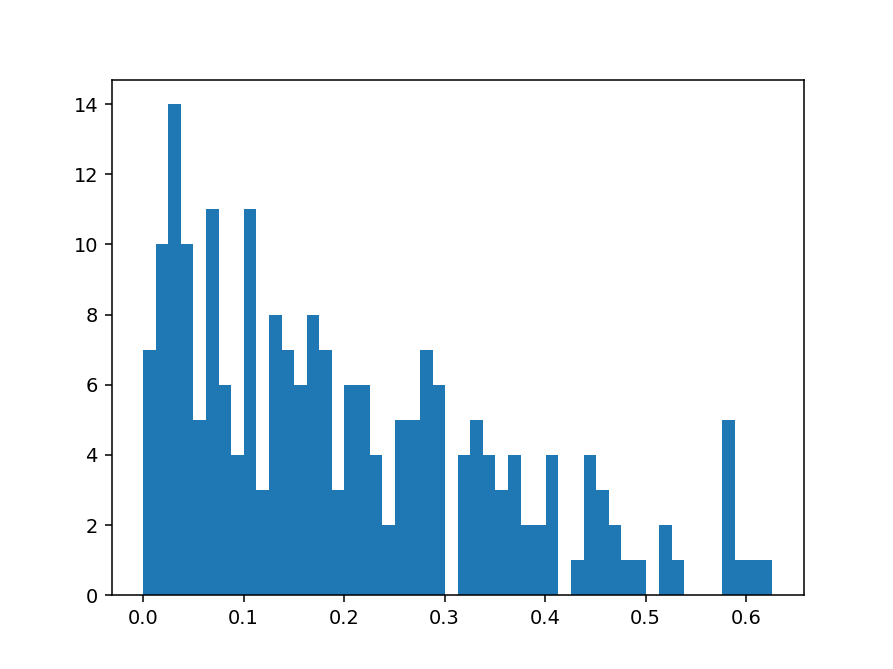

(array([ 7., 10., 14., 10.,  5., 11.,  6.,  4., 11.,  3.,  8.,  7.,  6.,
         8.,  7.,  3.,  6.,  6.,  4.,  2.,  5.,  5.,  7.,  6.,  0.,  4.,
         5.,  4.,  3.,  4.,  2.,  2.,  4.,  0.,  1.,  4.,  3.,  2.,  1.,
         1.,  0.,  2.,  1.,  0.,  0.,  0.,  5.,  1.,  1.,  1.]),
 array([0.     , 0.01252, 0.02504, 0.03756, 0.05008, 0.0626 , 0.07512,
        0.08764, 0.10016, 0.11268, 0.1252 , 0.13772, 0.15024, 0.16276,
        0.17528, 0.1878 , 0.20032, 0.21284, 0.22536, 0.23788, 0.2504 ,
        0.26292, 0.27544, 0.28796, 0.30048, 0.313  , 0.32552, 0.33804,
        0.35056, 0.36308, 0.3756 , 0.38812, 0.40064, 0.41316, 0.42568,
        0.4382 , 0.45072, 0.46324, 0.47576, 0.48828, 0.5008 , 0.51332,
        0.52584, 0.53836, 0.55088, 0.5634 , 0.57592, 0.58844, 0.60096,
        0.61348, 0.626  ]),
 <a list of 50 Patch objects>)

In [12]:
%matplotlib notebook
plt.hist(train_df["%pix_ext_na"], bins=50, cumulative=False, range=(0,0.626))

## Analyze test dataset

In [13]:
base_dir = "/mnt/sda/deep_learning/CSE527_FinalProject-master/images_martensite/"
test_rel_map = {"images": "test", "labels": "test_label"}
assert(os.path.isdir(base_dir))

In [14]:
test_input_pipeline = ImageInputPipeline(test_rel_map, ".tif", base_dir, shuffle=False)

Number of examples in dataset:  168


In [15]:
size = (256, 256)
num_pix_img = size[0] * size[1]
test_ds = test_input_pipeline._input_fn(size=size, batch_size=1, augment=False)

An example of how an image with defect area between 0.1% and 0.14% looks like:

0.128173828125


<IPython.core.display.Javascript object>


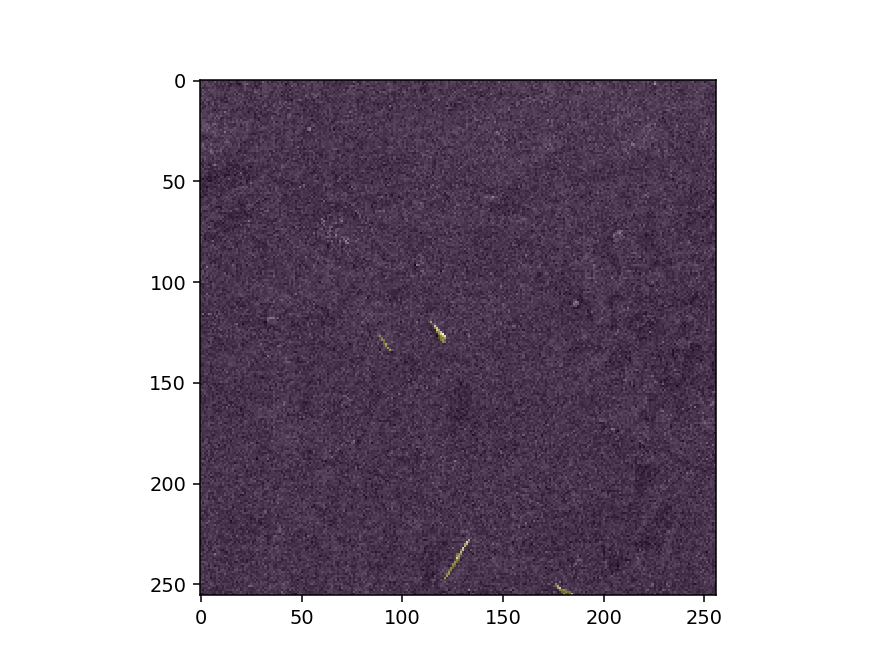

<IPython.core.display.Javascript object>


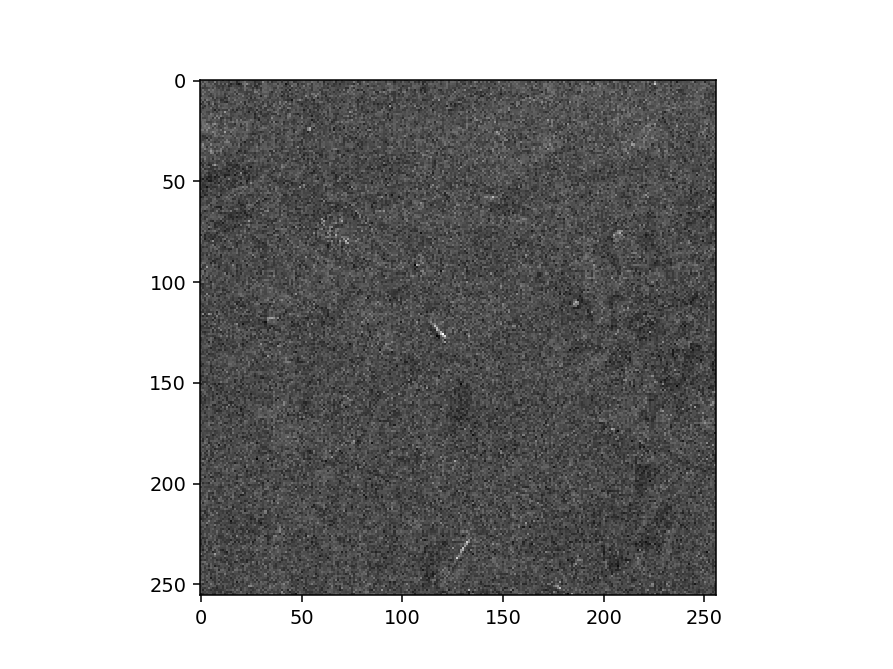

In [16]:
%matplotlib notebook
for img, mask in test_ds:
    if (mask>0).numpy().sum() > 0:
        percent_defect = 100*((mask.numpy()>0).sum())/num_pix_img
        if percent_defect > 0.1 and percent_defect < 0.14:
            print(percent_defect)
            plt.imshow(img[0,...,0], cmap="gray")
            plt.imshow(mask[0,...,0], alpha=0.3)
            plt.figure()
            plt.imshow(img[0,...,0], cmap="gray")
            break

In [20]:
pix_sum_crack = []
pix_sum_ext = []
for img, mask in test_ds:
    pix_sum_crack.append((mask.numpy()==1).sum())
    pix_sum_ext.append((mask.numpy()==2).sum())

In [21]:
test_df = pd.DataFrame(zip(pix_sum_crack, pix_sum_ext), columns=("#pix_crack", "#pix_ext")).replace(0, np.nan)
test_df.head()

,#pix_crack,#pix_ext
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,155.0
4,NaN,NaN


In [22]:
test_df["%pix_crack"] = np.where(pd.notna(test_df["#pix_crack"]), 100 * test_df["#pix_crack"]/num_pix_img, 0)
test_df["%pix_crack_na"] = 100 * test_df["#pix_crack"]/num_pix_img
test_df["%pix_ext"] = np.where(pd.notna(test_df["#pix_ext"]), 100 * test_df["#pix_ext"]/num_pix_img, 0)
test_df["%pix_ext_na"] = 100 * test_df["#pix_ext"]/num_pix_img
test_df.head()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
0,NaN,NaN,0.0,NaN,0.000000,NaN
1,NaN,NaN,0.0,NaN,0.000000,NaN
2,NaN,NaN,0.0,NaN,0.000000,NaN
3,NaN,155.0,0.0,NaN,0.236511,0.236511
4,NaN,NaN,0.0,NaN,0.000000,NaN


The summary below shows that:

- Percentage of pixels with extrusion in the dataset is 0.17%
- Out of 168 images, only 57 have extrusions in it
- If only images with extrusions are considered, then the percentage of pixels with extrusion is 0.502%

In [24]:
test_df.describe()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
count,0.0,57.000000,168.0,0.0,168.000000,57.000000
mean,NaN,329.105263,0.0,NaN,0.170381,0.502175
std,NaN,436.963781,0.0,NaN,0.453811,0.666754
min,NaN,3.000000,0.0,NaN,0.000000,0.004578
25%,NaN,73.000000,0.0,NaN,0.000000,0.111389
50%,NaN,152.000000,0.0,NaN,0.000000,0.231934
75%,NaN,431.000000,0.0,NaN,0.112152,0.657654
max,NaN,2293.000000,0.0,NaN,3.498840,3.498840


The histogram below shows that 80% of the images with extrusions have percentage of extrusion area in the image in the range from 0 to 0,634%

<IPython.core.display.Javascript object>


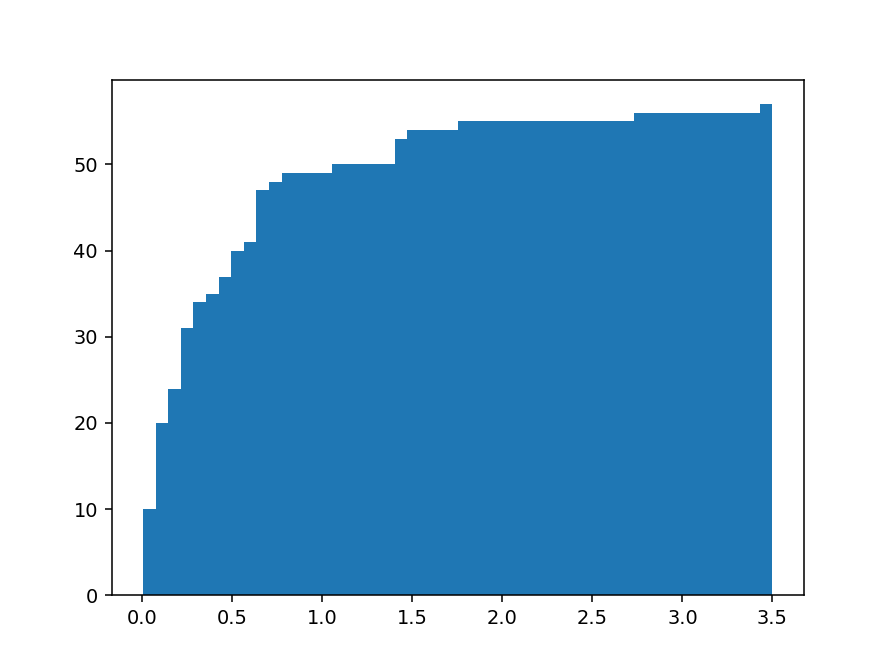

/home/labor/miniconda3/envs/dl_tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/labor/miniconda3/envs/dl_tf_env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([10., 20., 24., 31., 34., 35., 37., 40., 41., 47., 48., 49., 49.,
        49., 49., 50., 50., 50., 50., 50., 53., 54., 54., 54., 54., 55.,
        55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55., 55.,
        56., 56., 56., 56., 56., 56., 56., 56., 56., 56., 57.]),
 array([0.00457764, 0.07446289, 0.14434814, 0.2142334 , 0.28411865,
        0.35400391, 0.42388916, 0.49377441, 0.56365967, 0.63354492,
        0.70343018, 0.77331543, 0.84320068, 0.91308594, 0.98297119,
        1.05285645, 1.1227417 , 1.19262695, 1.26251221, 1.33239746,
        1.40228271, 1.47216797, 1.54205322, 1.61193848, 1.68182373,
        1.75170898, 1.82159424, 1.89147949, 1.96136475, 2.03125   ,
        2.10113525, 2.17102051, 2.24090576, 2.31079102, 2.38067627,
        2.45056152, 2.52044678, 2.59033203, 2.66021729, 2.73010254,
        2.79998779, 2.86987305, 2.9397583 , 3.00964355, 3.07952881,
        3.14941406, 3.21929932, 3.28918457, 3.35906982, 3.42895508,
        3.49884033]),
 <a list of 50

In [26]:
%matplotlib notebook
plt.hist(test_df["%pix_ext_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 0.634 % image area for extrusions

<IPython.core.display.Javascript object>


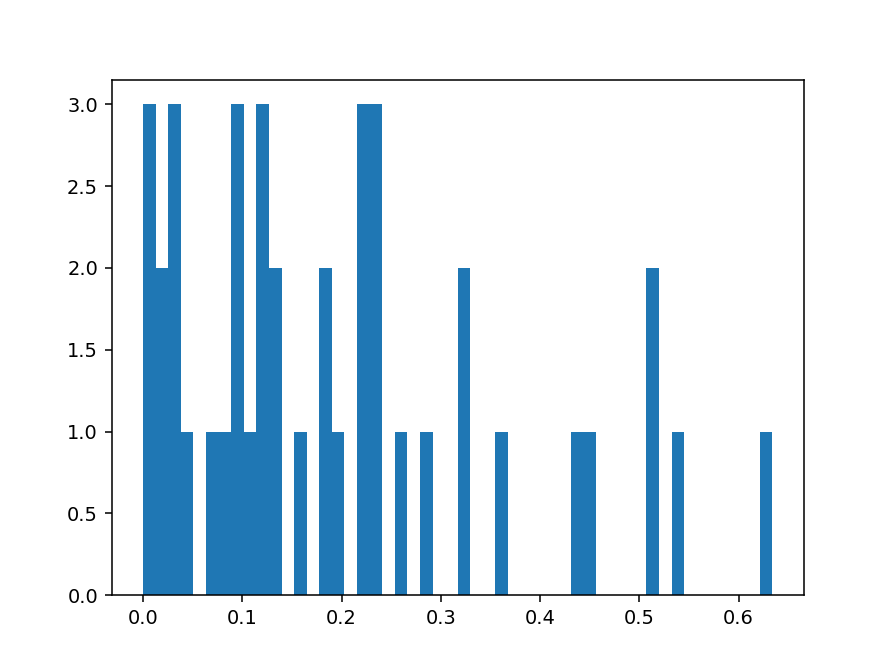

(array([3., 2., 3., 1., 0., 1., 1., 3., 1., 3., 2., 0., 1., 0., 2., 1., 0.,
        3., 3., 0., 1., 0., 1., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.     , 0.01268, 0.02536, 0.03804, 0.05072, 0.0634 , 0.07608,
        0.08876, 0.10144, 0.11412, 0.1268 , 0.13948, 0.15216, 0.16484,
        0.17752, 0.1902 , 0.20288, 0.21556, 0.22824, 0.24092, 0.2536 ,
        0.26628, 0.27896, 0.29164, 0.30432, 0.317  , 0.32968, 0.34236,
        0.35504, 0.36772, 0.3804 , 0.39308, 0.40576, 0.41844, 0.43112,
        0.4438 , 0.45648, 0.46916, 0.48184, 0.49452, 0.5072 , 0.51988,
        0.53256, 0.54524, 0.55792, 0.5706 , 0.58328, 0.59596, 0.60864,
        0.62132, 0.634  ]),
 <a list of 50 Patch objects>)

In [28]:
%matplotlib notebook
plt.hist(test_df["%pix_ext_na"], bins=50, cumulative=False, range=(0,0.634))